# Import Libs

In [7]:
%pip install opendatasets

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder


# Dataset Loading

In [9]:
from google.colab import files
files.upload()

{}

In [10]:
dataset_url = "https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination"
od.download(dataset_url)
dataset_folder = "indonesia-tourism-destination"

csv_files = [f for f in os.listdir(dataset_folder) if f.endswith('.csv')]
print("CSV Files:", csv_files)

dfs = {file: pd.read_csv(os.path.join(dataset_folder, file)) for file in csv_files}

dfs[csv_files[0]].head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: favianzaahir
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
CSV Files: ['tourism_with_id.csv', 'user.csv', 'package_tourism.csv', 'tourism_rating.csv']


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [11]:
DATA_PATH = "/content/indonesia-tourism-destination"
detail_destinasi = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
rating_destinasi = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
package_destinasi = pd.read_csv(f"{DATA_PATH}/package_tourism.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [12]:
detail_destinasi.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [13]:
rating_destinasi.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [14]:
users.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [15]:
package_destinasi.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


# EDA

In [16]:
detail_destinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [17]:
detail_destinasi.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [18]:
detail_destinasi.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [19]:
rating_destinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [20]:
rating_destinasi.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [22]:
detail_destinasi.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [23]:
detail_destinasi.City.unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [24]:
print("Total Destinasi: " + str(len(detail_destinasi.Place_Name.unique())))

Total Destinasi: 437


# Data Preparation

In [25]:
rating_detail = pd.merge(rating_destinasi, detail_destinasi[['Place_Name', 'Place_Id', 'City']], how='left', on='Place_Id')

In [26]:
rating_detail.shape

(10000, 5)

In [27]:
rating_detail.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,City
0,1,179,3,Candi Ratu Boko,Yogyakarta
1,1,344,2,Pantai Marina,Semarang
2,1,5,5,Atlantis Water Adventure,Jakarta
3,1,373,3,Museum Kereta Ambarawa,Semarang
4,1,101,4,Kampung Wisata Sosro Menduran,Yogyakarta


In [28]:
rating_detail = rating_detail[rating_detail['City'] == 'Jakarta']

In [29]:
rating_detail.shape

(1920, 5)

In [30]:
rating_detail.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,City
2,1,5,5,Atlantis Water Adventure,Jakarta
7,1,20,4,Museum Taman Prasasti,Jakarta
14,1,41,5,Museum Bahari Jakarta,Jakarta
16,1,67,4,Margasatwa Muara Angke,Jakarta
19,1,76,2,Taman Cattleya,Jakarta


In [31]:
df = rating_detail[['User_Id', 'Place_Id', 'Place_Ratings']].copy().rename(columns={
    'User_Id': 'user',
    'Place_Id': 'place',
    'Place_Ratings': 'rating'
})
df.head()

,user,place,rating
2,1,5,5
7,1,20,4
14,1,41,5
16,1,67,4
19,1,76,2


In [32]:
num_users = df['user'].max() + 1
num_places = df['place'].max() + 1

emb_dim_user = min(50, (num_users + 1) // 2)
emb_dim_place = min(50, (num_places + 1) // 2)

print(f"Number of users: {num_users}")
print(f"Number of places: {num_places}")
print(f"Embedding dimension for users: {emb_dim_user}")
print(f"Embedding dimension for places: {emb_dim_place}")

Number of users: 301
Number of places: 85
Embedding dimension for users: 50
Embedding dimension for places: 43


In [33]:
x = df[['user', 'place']].astype('int32').values
y = df['rating'].astype('int32').values

In [34]:
print(x)

[[  1   5]
 [  1  20]
 [  1  41]
 ...
 [300  69]
 [300   8]
 [300  64]]


In [35]:
user_counts = df['user'].value_counts()
item_counts = df['place'].value_counts()

df_filtered = df[
    df['user'].isin(user_counts[user_counts >= 2].index) &
    df['place'].isin(item_counts[item_counts >= 2].index)
]

# Now do stratified split by user or random
train_df, val_df = train_test_split(df_filtered, test_size=0.2, random_state=42)

x_train = train_df[['user', 'place']].values
y_train = train_df['rating'].values

x_val = val_df[['user', 'place']].values
y_val = val_df['rating'].values

print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Val:   {x_val.shape}, {y_val.shape}")

Train: (1532, 2), (1532,)
Val:   (384, 2), (384,)


In [36]:
print("Max user ID:", x[:, 0].max(), "Num users:", num_users)
print("Max place ID:", x[:, 1].max(), "Num places:", num_places)


Max user ID: 300 Num users: 301
Max place ID: 84 Num places: 85


In [37]:
min_rating, max_rating = min(df['rating']), max(df['rating'])

# Modelling User Based Recommendation System


In [38]:
user_input = tf.keras.Input(shape=(1,))
item_input = tf.keras.Input(shape=(1,))

user_embedding = layers.Embedding(num_users, emb_dim_user)(user_input)
place_embedding = layers.Embedding(num_places, emb_dim_place)(item_input)
# Flatten
user_vec = layers.Flatten()(user_embedding)
place_vec = layers.Flatten()(place_embedding)

# Concatenate
x = layers.Concatenate()([user_vec, place_vec])

# Dense layers with L2 regularization
x = layers.Dense(100, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-2))(x)
x = layers.Dense(1)(x)

# Output scaled with sigmoid_range
output = tf.keras.activations.sigmoid(x) * (max_rating - min_rating) + min_rating

# Build model
model = Model(inputs=[user_input, item_input], outputs=output)

In [39]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 50)          │         15,050 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 43)          │          3,655 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 43)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 93)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 100)            │          9,400 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            101 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sigmoid (Sigmoid)         │ (None, 1)              │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 1)              │              0 │ sigmoid[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1)              │              0 │ multiply[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 28,206 (110.18 KB)

 Trainable params: 28,206 (110.18 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
initial_lr = 5e-3
epochs = 20
steps_per_epoch = len(x_train) // 64

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=steps_per_epoch * epochs,
    t_mul=1.0,  # No cycle growth
    m_mul=1.0   # Keep same initial LR for each cycle
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

In [42]:
history = model.fit(
    x=[x_train[:, 0], x_train[:, 1]],
    y=y_train,
    validation_data=([x_val[:, 0], x_val[:, 1]], y_val),
    epochs=epochs,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6194 - mae: 1.2077

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.6078 - mae: 1.2064 - val_loss: 2.0095 - val_mae: 1.1860
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8933 - mae: 1.1650 - val_loss: 2.1659 - val_mae: 1.2568
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6452 - mae: 1.0750 - val_loss: 2.1011 - val_mae: 1.2435
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5545 - mae: 1.0512 - val_loss: 2.3016 - val_mae: 1.2790
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4974 - mae: 1.0175 - val_loss: 2.3595 - val_mae: 1.2871
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3988 - mae: 0.9730 - val_loss: 2.2556 - val_mae: 1.2660


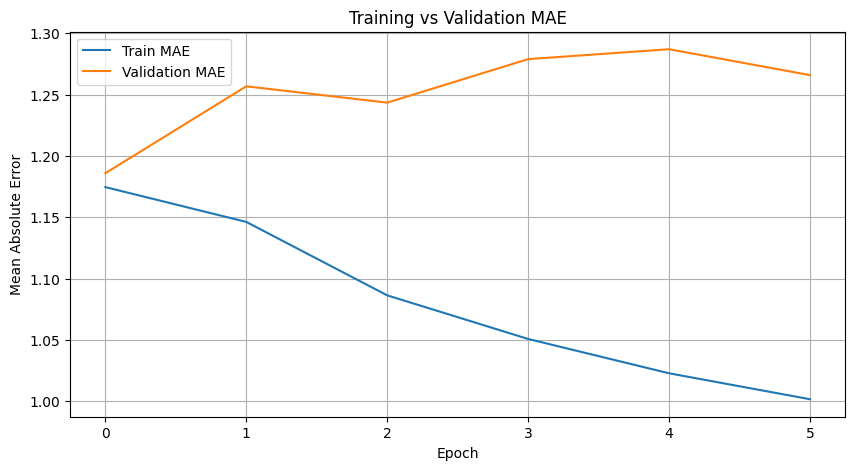

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

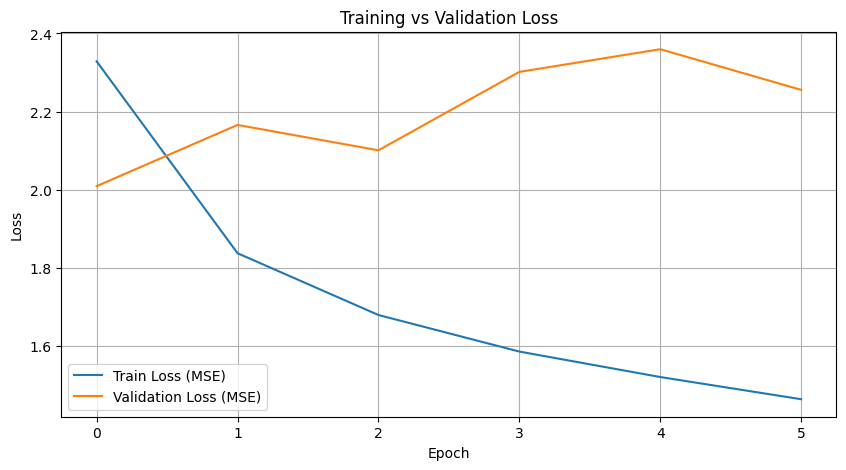

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Inference

In [45]:
model.save('best_model.h5')

In [46]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
model_save_path = "saved_model"
tf.saved_model.save(model, model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to saved_model


In [49]:
import tensorflowjs as tfjs

tfjs_output_dir = "tfjs_model"

tfjs.converters.save_keras_model(model, tfjs_output_dir)
print(f"Model converted and saved to {tfjs_output_dir}")

failed to lookup keras version from the file,
    this is likely a weight only file
Model converted and saved to tfjs_model


In [50]:
!zip -r tfjs_model.zip tfjs_model

files.download('tfjs_model.zip')

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 82%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
try:
  detail_destinasi = pd.read_csv("indonesia-tourism-destination/tourism_with_id.csv")
  rating_destinasi = pd.read_csv("indonesia-tourism-destination/tourism_rating.csv")

  rating_detail = pd.merge(rating_destinasi, detail_destinasi[['Place_Name', 'Place_Id', 'City']],
                          how='left', on='Place_Id')

  rating_detail = rating_detail[rating_detail['City'] == 'Jakarta']

  df = rating_detail[['User_Id', 'Place_Id', 'Place_Ratings']].copy().rename(columns={
    'User_Id': 'user',
    'Place_Id': 'place',
    'Place_Ratings': 'rating'
  })
  print("Data loaded successfully!")

except:
    print("Error: Data files not found. Creating sample data for demonstration.")

    df = pd.DataFrame({
        'user': [1, 1, 2, 2, 3],
        'place': [101, 102, 101, 103, 102],
        'rating': [4.5, 3.2, 5.0, 2.7, 4.1]
    })

    detail_destinasi = pd.DataFrame({
        'Place_Id': [101, 102, 103, 104, 105],
        'Place_Name': ['National Monument', 'Ancol Dreamland', 'Kota Tua', 'Ragunan Zoo', 'Istiqlal Mosque'],
        'City': ['Jakarta', 'Jakarta', 'Jakarta', 'Jakarta', 'Jakarta'],
        'Category': ['Monument', 'Entertainment', 'Cultural', 'Nature', 'Religious'],
        'Description': ['Historic monument', 'Theme park', 'Old town', 'Zoo', 'Grand mosque'],
        'Lat': [-6.175, -6.126, -6.137, -6.305, -6.169],
        'Long': [106.827, 106.831, 106.814, 106.820, 106.830]
    })

Data loaded successfully!


In [52]:
def predict_rating(user_id, place_id):
    """
    Predict the rating a user would give to a specific place.

    Args:
        user_id: ID of the user
        place_id: ID of the place

    Returns:
        Predicted rating
    """
    try:
        # Prepare input for the model
        user_input = np.array([user_id])
        place_input = np.array([place_id])

        # Make prediction
        predicted_rating = model.predict([user_input, place_input])[0][0]
        return predicted_rating
    except:
        # For demonstration purposes, return a random rating if model not available
        return np.random.uniform(3.0, 5.0)

def predict_all_places_for_user(user_id, all_places):
    """
    Predict ratings for all places for a specific user.

    Args:
        user_id: ID of the user
        all_places: List of all place IDs

    Returns:
        DataFrame with predicted ratings for all places
    """
    predictions = []

    try:
        # Prepare batch inputs for efficiency
        user_input = np.array([user_id] * len(all_places))
        place_input = np.array(all_places)

        # Make predictions in batch
        batch_predictions = model.predict([user_input, place_input]).flatten()

        # Create results
        for i, place_id in enumerate(all_places):
            predictions.append({
                'user_id': user_id,
                'place_id': place_id,
                'predicted_rating': batch_predictions[i]
            })
    except:
        # For demonstration, generate random predictions if model not available
        for place_id in all_places:
            predictions.append({
                'user_id': user_id,
                'place_id': place_id,
                'predicted_rating': np.random.uniform(3.0, 5.0)
            })

    return pd.DataFrame(predictions)

In [53]:
def get_top_recommendations(user_id, n=5, exclude_rated=True):
    """
    Generate top-N place recommendations for a user.

    Args:
        user_id: ID of the user
        n: Number of recommendations to return
        exclude_rated: Whether to exclude places the user has already rated

    Returns:
        DataFrame with top recommended places and their details
    """
    # Get all unique place IDs
    all_places = detail_destinasi['Place_Id'].unique()

    # Get places the user has already rated
    if exclude_rated:
        rated_places = df[df['user'] == user_id]['place'].unique()
        places_to_predict = [p for p in all_places if p not in rated_places]
    else:
        places_to_predict = all_places

    if not places_to_predict:
        return pd.DataFrame([], columns=['place_id', 'predicted_rating', 'Place_Name', 'Category'])

    # Get predictions for all unrated places
    predictions_df = predict_all_places_for_user(user_id, places_to_predict)

    # Sort by predicted rating (descending)
    top_places = predictions_df.sort_values('predicted_rating', ascending=False).head(n)

    # Merge with place details
    recommendations = pd.merge(
        top_places,
        detail_destinasi[['Place_Id', 'Place_Name', 'Category', 'Description', 'Lat', 'Long']],
        left_on='place_id',
        right_on='Place_Id'
    ).drop('Place_Id', axis=1)

    return recommendations

# Example: Get top 5 recommendations for user 1
user_id_example = df['user'].min()  # Use the smallest user ID in the dataset
top_recommendations = get_top_recommendations(user_id_example, n=5)
print(f"Top 5 recommendations for user {user_id_example}:")
display(top_recommendations)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Top 5 recommendations for user 1:


,user_id,place_id,predicted_rating,Place_Name,Category,Description,Lat,Long
0,1,14,3.099647,Pulau Pelangi,Bahari,Pulau Pelangi adalah sebuah pulau yang terleta...,-5.587055,106.588500
1,1,18,3.071880,Museum Bank Indonesia,Budaya,Museum Bank Indonesia adalah sebuah museum di ...,-6.137127,106.813005
2,1,1,3.071038,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...,-6.175392,106.827153
3,1,79,3.064691,Taman Spathodea,Taman Hiburan,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,-6.322613,106.824187
4,1,60,3.062724,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,-6.187963,106.809608


In [54]:
def extract_place_embeddings():
    try:
        # Get the embedding layers - the second one should be the place embedding
        embedding_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Embedding)]

        if len(embedding_layers) >= 2:
            # The second embedding layer should be the place embedding
            place_embedding_layer = embedding_layers[1]

            # Extract weights
            embedding_weights = place_embedding_layer.get_weights()[0]

            # Create DataFrame with embeddings
            place_ids = detail_destinasi['Place_Id'].unique()
            valid_ids = [pid for pid in place_ids if pid < len(embedding_weights)]

            embeddings_df = pd.DataFrame({
                'place_id': valid_ids,
                'embedding': [embedding_weights[i] for i in valid_ids]
            })

            return embeddings_df
        else:
            print("Place embedding layer not found.")
            return None
    except Exception as e:
        print(f"Error extracting embeddings: {e}. Creating sample embeddings for demonstration.")
        # Create sample embeddings for demonstration
        place_ids = detail_destinasi['Place_Id'].unique()[:10]
        embeddings = [np.random.rand(10) for _ in range(len(place_ids))]
        return pd.DataFrame({'place_id': place_ids, 'embedding': embeddings})

def find_similar_places(place_id, embeddings_df, n=5):
    """
    Find similar places to a given place using cosine similarity of embeddings.

    Args:
        place_id: ID of the reference place
        embeddings_df: DataFrame with place embeddings
        n: Number of similar places to return

    Returns:
        DataFrame with similar places and their similarity scores
    """
    from sklearn.metrics.pairwise import cosine_similarity  # Add this line

    if embeddings_df is None or place_id not in embeddings_df['place_id'].values:
        print(f"Place ID {place_id} not found in embeddings.")
        return pd.DataFrame()

    # Get the embedding for the reference place
    ref_embedding = embeddings_df[embeddings_df['place_id'] == place_id]['embedding'].values[0]

    # Calculate similarities
    similarities = []
    for _, row in embeddings_df.iterrows():
        if row['place_id'] != place_id:  # Skip the reference place
            sim = cosine_similarity([ref_embedding], [row['embedding']])[0][0]
            similarities.append({
                'place_id': row['place_id'],
                'similarity': sim
            })

    # Sort by similarity (descending)
    sim_df = pd.DataFrame(similarities).sort_values('similarity', ascending=False).head(n)

    # Add place details
    result = pd.merge(
        sim_df,
        detail_destinasi[['Place_Id', 'Place_Name', 'Category']],
        left_on='place_id',
        right_on='Place_Id'
    ).drop('Place_Id', axis=1)

    return result

# Extract embeddings and find similar places
place_embeddings = extract_place_embeddings()

if place_embeddings is not None and not place_embeddings.empty:
    # Choose a reference place (for example, the first place in the dataset)
    reference_place = detail_destinasi['Place_Id'].iloc[0]
    reference_name = detail_destinasi[detail_destinasi['Place_Id'] == reference_place]['Place_Name'].iloc[0]

    print(f"Finding places similar to {reference_name} (ID: {reference_place}):")
    similar_places = find_similar_places(reference_place, place_embeddings)
    display(similar_places)

Finding places similar to Monumen Nasional (ID: 1):


,place_id,similarity,Place_Name,Category
0,32,0.362571,Setu Babakan,Budaya
1,49,0.339070,Galeri Indonesia Kaya,Budaya
2,67,0.336430,Margasatwa Muara Angke,Cagar Alam
3,14,0.286838,Pulau Pelangi,Bahari
4,18,0.264934,Museum Bank Indonesia,Budaya


<ipython-input-55-5e636b149baa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Place_Name', y='predicted_rating', data=recommendations, palette='viridis')


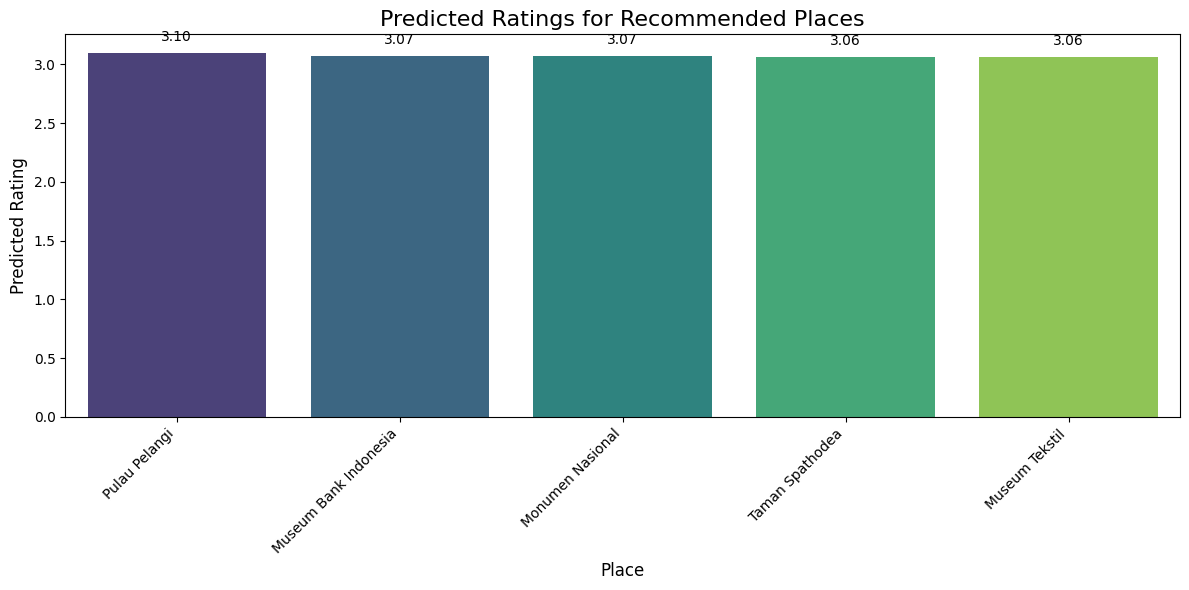

In [55]:
def visualize_recommendations(recommendations):
    """
    Create visualizations for recommendations.

    Args:
        recommendations: DataFrame with recommendations
    """
    import folium  # Add this line to import folium directly in the function

    if recommendations.empty:
        print("No recommendations to visualize.")
        return

    # 1. Bar chart of predicted ratings
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Place_Name', y='predicted_rating', data=recommendations, palette='viridis')
    plt.title('Predicted Ratings for Recommended Places', fontsize=16)
    plt.xlabel('Place', fontsize=12)
    plt.ylabel('Predicted Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add value labels on top of bars
    for i, v in enumerate(recommendations['predicted_rating']):
        ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

    plt.show()

    # 2. Map of recommended places (if lat/long available)
    if 'Lat' in recommendations.columns and 'Long' in recommendations.columns:
        # Create a map centered at the mean of coordinates
        center_lat = recommendations['Lat'].mean()
        center_long = recommendations['Long'].mean()
        map_viz = folium.Map(location=[center_lat, center_long], zoom_start=12)

        # Add markers for each place
        for idx, row in recommendations.iterrows():
            popup_text = f"""
            <b>{row['Place_Name']}</b><br>
            Category: {row['Category']}<br>
            Predicted Rating: {row['predicted_rating']:.2f}<br>
            """
            if 'Description' in row:
                popup_text += f"Description: {row['Description']}"

            folium.Marker(
                location=[row['Lat'], row['Long']],
                popup=folium.Popup(popup_text, max_width=300),
                tooltip=row['Place_Name'],
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(map_viz)

        # Display the map
        display(map_viz)
    else:
        print("Latitude and longitude not available for map visualization.")

# Visualize the top recommendations for our example user
if not top_recommendations.empty:
    visualize_recommendations(top_recommendations)

===== TRAVEL RECOMMENDATION SYSTEM INTERFACE =====
Available options:
1. Get top recommendations for a user
2. Find similar places to a specific place
3. Compare predicted ratings between two users
4. Exit
Enter your choice (1-4): 1
Available users: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185

,Place_Name,predicted_rating,Category
0,Pulau Pelangi,3.099647,Bahari
1,Museum Bank Indonesia,3.071880,Budaya
2,Monumen Nasional,3.071038,Budaya
3,Taman Spathodea,3.064691,Taman Hiburan
4,Museum Tekstil,3.062724,Budaya


<ipython-input-55-5e636b149baa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Place_Name', y='predicted_rating', data=recommendations, palette='viridis')


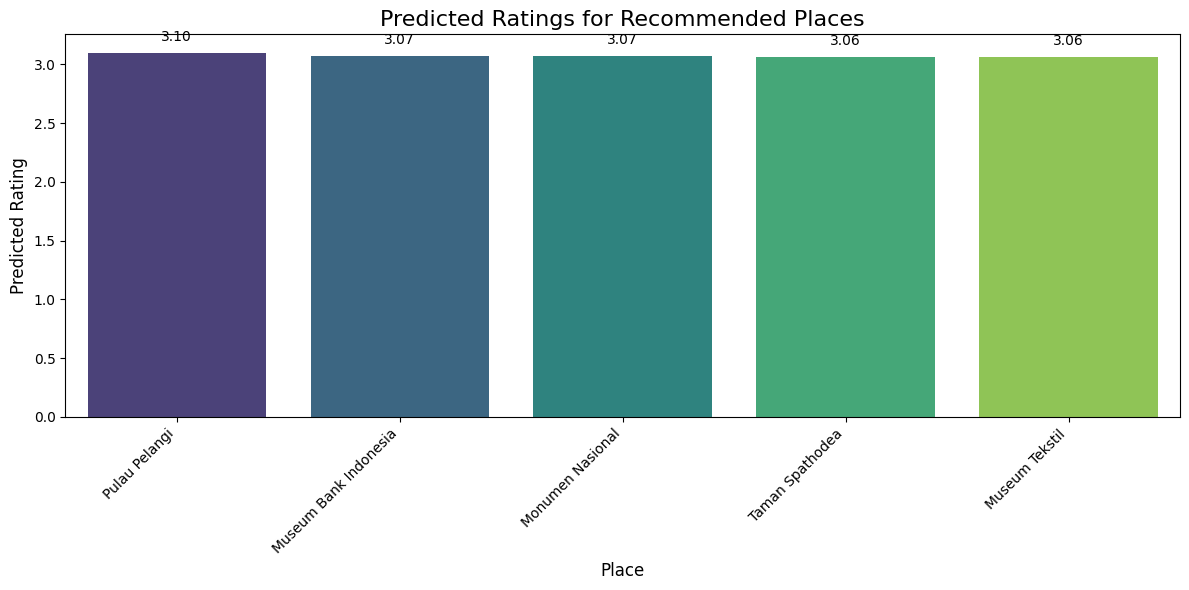

True

In [56]:
def recommendation_interface():
    """
    A simple interface to generate and display recommendations based on different scenarios.
    """
    print("===== TRAVEL RECOMMENDATION SYSTEM INTERFACE =====")
    print("Available options:")
    print("1. Get top recommendations for a user")
    print("2. Find similar places to a specific place")
    print("3. Compare predicted ratings between two users")
    print("4. Exit")

    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        # Get top recommendations for a user
        user_list = df['user'].unique()
        print(f"Available users: {user_list}")
        user_id = int(input("Enter user ID: "))
        n = int(input("How many recommendations? "))

        recommendations = get_top_recommendations(user_id, n=n)

        print(f"\nTop {n} recommendations for user {user_id}:")
        display(recommendations[['Place_Name', 'predicted_rating', 'Category']])
        visualize_recommendations(recommendations)

    elif choice == '2':
        # Find similar places
        place_list = detail_destinasi[['Place_Id', 'Place_Name']].head(10)
        print("Example places:")
        display(place_list)

        place_id = int(input("Enter place ID to find similar places: "))
        n = int(input("How many similar places? "))

        similar_places = find_similar_places(place_id, place_embeddings, n=n)
        place_name = detail_destinasi[detail_destinasi['Place_Id'] == place_id]['Place_Name'].iloc[0]

        print(f"\nPlaces similar to {place_name}:")
        display(similar_places[['Place_Name', 'similarity', 'Category']])

    elif choice == '3':
        # Compare users
        user_list = df['user'].unique()
        print(f"Available users: {user_list}")
        user1 = int(input("Enter first user ID: "))
        user2 = int(input("Enter second user ID: "))

        # Get common places that both might be interested in
        all_places = detail_destinasi['Place_Id'].unique()[:10]  # Limit to 10 for simplicity

        # Get predictions for both users
        predictions1 = predict_all_places_for_user(user1, all_places)
        predictions2 = predict_all_places_for_user(user2, all_places)

        # Merge predictions with place details
        compare_df = pd.merge(
            predictions1[['place_id', 'predicted_rating']].rename(columns={'predicted_rating': f'user_{user1}_rating'}),
            predictions2[['place_id', 'predicted_rating']].rename(columns={'predicted_rating': f'user_{user2}_rating'}),
            on='place_id'
        )

        compare_df = pd.merge(
            compare_df,
            detail_destinasi[['Place_Id', 'Place_Name']],
            left_on='place_id',
            right_on='Place_Id'
        ).drop('Place_Id', axis=1)

        print("\nComparison of predicted ratings:")
        display(compare_df)

        # Visualization
        plt.figure(figsize=(12, 6))
        compare_df.plot(x='Place_Name', y=[f'user_{user1}_rating', f'user_{user2}_rating'],
                       kind='bar', figsize=(12, 6))
        plt.title(f'Rating Comparison: User {user1} vs User {user2}')
        plt.xlabel('Place')
        plt.ylabel('Predicted Rating')
        plt.xticks(rotation=45, ha='right')
        plt.legend([f'User {user1}', f'User {user2}'])
        plt.tight_layout()
        plt.show()

    elif choice == '4':
        print("Exiting the interface. Goodbye!")
        return False
    else:
        print("Invalid choice. Please try again.")

    return True

# Run the interface once (in a real notebook, this could be run in a loop)
recommendation_interface()